In [1]:
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

import openai
from openai import AzureOpenAI
# from prompt import role_prompt,getQuizPrompt

# Get DAta

In [77]:
df_data = pd.read_csv("Artificial Intelligence.csv")

In [3]:
df_data

,Company Names,Job Titles,Posted On,Job Details,Skill,Images,Type Location,Locations
0,PT. BANK NEGARA INDONESIA (Persero) Tbk.,Solutions Architect,Reposted 4 weeks ago,Requirements :\n\nBachelor's degree in Compute...,"Application Programming Interfaces (API), Busi...",https://media.licdn.com/dms/image/v2/D560BAQGq...,On-site,"Jakarta, Indonesia"
1,"LanceSoft, Inc.",Business Development,1 week ago,"The ideal candidate is a motivated, organized,...","Account Management, Agent Recruitment, Busines...",https://media.licdn.com/dms/image/v2/D560BAQFn...,On-site,Jakarta Metropolitan Area
2,IBM,SAP MM Consultant,Reposted 1 week ago,Introduction\n\nAs a Package Consultant at IBM...,"ABAP, Master Data, SAP FI, SAP HANA, SAP PP, S...",https://media.licdn.com/dms/image/v2/D560BAQGi...,On-site,Jakarta Metropolitan Area
3,Ollion,Senior Solution Architect,Reposted 3 weeks ago,Company Description\n\nOUR STORY\n\nLet’s be h...,"Architecture, Cloud Computing, Documentation, ...",https://media.licdn.com/dms/image/v2/D4D0BAQGL...,On-site,"Jakarta, Jakarta, Indonesia"
4,TabSquare.AI,Quality Assurance Automation Lead,2 weeks ago,About Tabsquare\n\nTabSquare provides AI-power...,"Agile Methodologies, Design Documents, JMeter,...",https://media.licdn.com/dms/image/v2/D560BAQHW...,Hybrid,"Jakarta, Indonesia"
...,...,...,...,...,...,...,...,...
189,Match Made,Software Engineer,2 weeks ago,Company Description\nMatch Made is a software ...,"Computer Science, Programming, Programming Lan...",https://media.licdn.com/dms/image/v2/D560BAQF1...,Hybrid,"Jakarta, Indonesia"
190,Essity,IT Business Analyst - Supply Chain,1 week ago,Essity – a leading global hygiene and health c...,"Business Analysis, Business Process, Business ...",https://media.licdn.com/dms/image/v2/C560BAQEp...,Hybrid,"Jakarta, Jakarta, Indonesia"
191,Krom,Lead Backend Engineer - Digital Banking,6 days ago,Responsibilities:\nManage the backend engineer...,"Back-End Web Development, Communication, Compu...",https://media.licdn.com/dms/image/v2/D560BAQGj...,Hybrid,"Jakarta, Indonesia"
192,Ultra Voucher,Product Support Internship,2 weeks ago,Job description\nCustomer Assistance: Assist c...,"Communication, Cross-functional Team Leadershi...",https://media.licdn.com/dms/image/v2/C560BAQHy...,On-site,"Tebet, Jakarta, Indonesia"


# Trending Job Title

In [4]:
df_data['Job Titles'].to_list()

['Solutions Architect',
 'Business Development',
 'SAP MM Consultant',
 'Senior Solution Architect',
 'Quality Assurance Automation Lead',
 'Cloud Migration Developer',
 'Business Development Manager',
 'SAP MM Consultant',
 'iOS Developer',
 'Head Information Technology Development',
 'Senior Fullstack Engineer, Lending',
 'Integrated Marketing Senior Specialist',
 'Senior Presales Consultant - Data Center',
 'Service Engineer',
 'Cryptocurrency Trader',
 'Associate Director / Director, Talent Acquisition (Bangkok-based, Relocation Provided)',
 'Partner Executive – Singapore (Bali Based)',
 'Senior Data Analyst (Marketing Analytics)',
 'Cloud Enterprise Architect',
 'Senior Backend Engineer, Lending',
 'Quality Assurance Engineer',
 'Business Development Representative (Outbound), Lark APAC',
 'Senior Data Analyst',
 'Technology Assurance - Senior Associate - FS Industries',
 'Sales Manager -Jakarta',
 'Presales Solution Architecture (Cloud Iaas / Paas)',
 'SAP Production Planning Con

In [5]:
job_titles = df_data['Job Titles'].to_list()

In [6]:
df_data[df_data['Job Titles'].str.contains("football", case=False)]

,Company Names,Job Titles,Posted On,Job Details,Skill,Images,Type Location,Locations


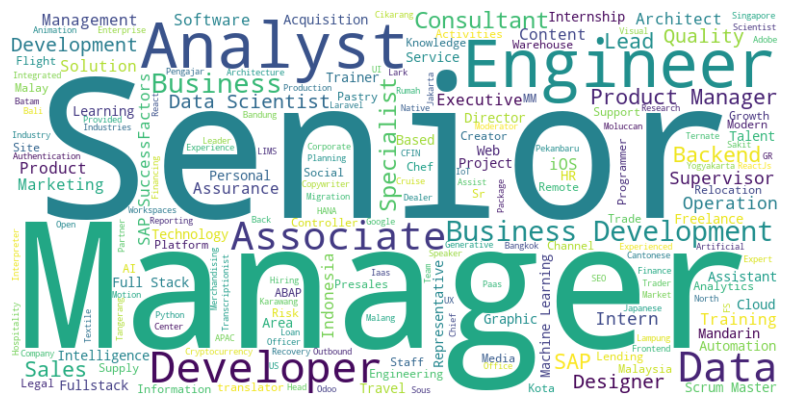

In [7]:
text = " ".join(job for job in job_titles)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan sumbu
plt.show()

## Cleaning Bos Q

In [8]:
df_JT = df_data.copy()
df_JT.drop_duplicates(subset=['Company Names','Job Titles'], inplace=True)

In [9]:
df_JT['Job Titles'].to_list()

['Solutions Architect',
 'Business Development',
 'SAP MM Consultant',
 'Senior Solution Architect',
 'Quality Assurance Automation Lead',
 'Cloud Migration Developer',
 'Business Development Manager',
 'iOS Developer',
 'Head Information Technology Development',
 'Senior Fullstack Engineer, Lending',
 'Integrated Marketing Senior Specialist',
 'Senior Presales Consultant - Data Center',
 'Service Engineer',
 'Cryptocurrency Trader',
 'Associate Director / Director, Talent Acquisition (Bangkok-based, Relocation Provided)',
 'Partner Executive – Singapore (Bali Based)',
 'Senior Data Analyst (Marketing Analytics)',
 'Cloud Enterprise Architect',
 'Senior Backend Engineer, Lending',
 'Quality Assurance Engineer',
 'Business Development Representative (Outbound), Lark APAC',
 'Senior Data Analyst',
 'Technology Assurance - Senior Associate - FS Industries',
 'Sales Manager -Jakarta',
 'Presales Solution Architecture (Cloud Iaas / Paas)',
 'SAP Production Planning Consultant',
 'Risk Repor

In [10]:
# Fungsi untuk membersihkan job titles
def clean_job_title(title):
    title = str(title).lower()
    if "science" in title.lower():
        title = title.lower().replace("science", "scientist")
    if "engineering" in title.lower():
        title = title.lower().replace("engineering", "engineer")
    if "analytics" in title.lower():
        title = title.lower().replace("analytics", "analyst")
    if "ds" in title.lower():
        title = title.lower().replace("ds", "data scientist")
    if "front end" in title.lower():
        title = title.lower().replace("front end", "frontend")
    if "(" in title.lower():
        title = title.lower().replace("(", ",")
    if "lead" in title.lower():
        title = title.lower().replace("lead", "")
    if "senior" in title.lower():
        title = title.lower().replace("senior", "")
    if "remote" in title.lower():
        title = title.lower().replace("remote", "")
    if "sr." in title.lower():
        title = title.lower().replace("sr.", "")
    # if "data" in title.lower():
    #     title = title.lower().replace("data", "")
    # Menghapus kata 'intern', 'internship', dan 'freelance'
    title = re.sub(r'\b(intern(ship)?|freelance)\b', '', title, flags=re.IGNORECASE)
    title = re.sub(r'[()]', '', title)
            
    return title.strip()

# Menerapkan fungsi ke kolom 'Job Title'
df_JT['Job Titles'] = df_JT['Job Titles'].apply(clean_job_title)

In [12]:
client = AzureOpenAI(
    api_key="8575d0680b2e48599a9058bf62713335",  
    api_version="2024-02-01",
    azure_endpoint="https://skillupllm.openai.azure.com/"
)
    
deployment_name = 'SkillUp-4o'

In [13]:
prompt_final = '''
ini adalah list job title Backend dari hasil pengambilan data di linkedin. berikan saya 5 job yang paling banyak dicari
'''+str(df_JT['Job Titles'].to_list())+'''

Terdapat aturan yang harus kamu patuhi :
1. Hasil keluaran wajib dalam format seperti contoh di bawah :
[
 {'job_title':'Nama Job','total':45},
 {'job_title':'Nama Job','total':17},
 {'job_title':'Nama Job','total':11},
 {'job_title':'Nama Job','total':10},
 {'job_title':'Nama Job','total':6}
]
2. Tidak boleh ada keluaran lain selain pada poin 1
3. Jangan sampai ada nama tempat di hasilnya, betul betul hanya nama job
4. Jangan sampe ada yang double job misal 'data warehouse data engineer'
'''

In [14]:
response = client.chat.completions.create(model=deployment_name, messages=[{"role": "user", "content": prompt_final}], stream=False, max_tokens=2000, temperature=0 )
result = response.choices[0].message.content

In [15]:
import json

# Membersihkan string dan mengganti tanda kutip tunggal dengan kutip ganda
cleaned_string = result.replace("'", '"').replace("\n", "").replace("```json", "").replace("```", "").strip()

# Mengonversi string menjadi JSON
json_data = json.loads(cleaned_string)

# Menampilkan hasil
print(json_data)

[{'job_title': 'business development', 'total': 6}, {'job_title': 'data analyst', 'total': 6}, {'job_title': 'data scientist', 'total': 6}, {'job_title': 'scrum master', 'total': 3}, {'job_title': 'ios developer', 'total': 3}]


# Create Table untuk Menyimpan Data Hasil Scrapping

Connection pool created successfully
